<a href="https://colab.research.google.com/github/kaushikrahul1993/E-Commerce-Domain/blob/main/E_Commerce_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path=r'/content/drive/MyDrive/Colab Notebooks/RealTime Projects/May 2024- Project by Sundaram/E-Commerce Domain'
os.chdir(path)
sys.path.append(path)

In [4]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_excel("E-com_Data.xlsx")
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [ ]:
df.shape,len(df)

((541116, 12), 541116)

In [ ]:
df.isna().sum()/len(df)*100

,0
CustomerID,25.304556
Item Code,0.579728
InvoieNo,0.579728
Date of purchase,0.579728
Quantity,0.579728
Time,0.579728
price per Unit,0.579728
Price,0.579728
Shipping Location,0.579728
Cancelled_status,98.457817


In [ ]:
df=df.drop(columns=["Cancelled_status","Reason of return","Sold as set"])

In [ ]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1


In [ ]:
df.isna().sum()/len(df)*100

,0
CustomerID,25.304556
Item Code,0.579728
InvoieNo,0.579728
Date of purchase,0.579728
Quantity,0.579728
Time,0.579728
price per Unit,0.579728
Price,0.579728
Shipping Location,0.579728


In [ ]:
drop_index=df[df["CustomerID"].isna()].index
drop_index

Index([  2925,   2926,   2927,   2928,   2929,   2930,   2931,   2932,   2933,
         2934,
       ...
       541106, 541107, 541108, 541109, 541110, 541111, 541112, 541113, 541114,
       541115],
      dtype='int64', length=136927)

In [ ]:
df.drop(index=drop_index,inplace=True)

In [ ]:
df.isna().sum()/len(df)*100

,0
CustomerID,0.0
Item Code,0.0
InvoieNo,0.0
Date of purchase,0.0
Quantity,0.0
Time,0.0
price per Unit,0.0
Price,0.0
Shipping Location,0.0


In [ ]:
df.duplicated(keep=False).sum()

16

In [ ]:
df[df.duplicated(subset=None, keep=False)]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
61201,4043.0,15819,403353.0,02-12-2017,1.0,2:07:00 PM,447.0,447.0,Location 36
61202,4043.0,15819,403353.0,02-12-2017,1.0,2:07:00 PM,447.0,447.0,Location 36
70586,3984.0,15422,405579.0,09-12-2017,24.0,2:09:00 PM,77.0,1848.0,Location 36
70587,3984.0,15422,405579.0,09-12-2017,24.0,2:09:00 PM,77.0,1848.0,Location 36
84822,3828.0,14519,398139.0,31-10-2017,1.0,2:04:00 PM,85.0,85.0,Location 36
84823,3828.0,14519,398139.0,31-10-2017,1.0,2:04:00 PM,85.0,85.0,Location 36
120520,3384.0,15121,380588.0,11-06-2017,1.0,11:37:00 AM,298.0,298.0,Location 36
120521,3384.0,15121,380588.0,11-06-2017,1.0,11:37:00 AM,298.0,298.0,Location 36
182785,2607.0,15660,393225.0,30-09-2017,1.0,12:31:00 PM,484.0,484.0,Location 36
182786,2607.0,15660,393225.0,30-09-2017,1.0,12:31:00 PM,484.0,484.0,Location 36


In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.describe()

,CustomerID,InvoieNo,Quantity,price per Unit,Price
count,404181.000000,404181.000000,404181.000000,404181.000000,404181.000000
mean,2181.897630,385648.273397,11.478669,341.450009,2474.139920
std,1252.681271,13107.396221,29.489919,427.242005,4891.388347
min,2.000000,361429.000000,-152.000000,2.000000,-10152.000000
25%,1207.000000,374194.000000,2.000000,158.000000,555.000000
50%,2078.000000,386937.000000,5.000000,238.000000,1572.000000
75%,3291.000000,397130.000000,12.000000,407.000000,2492.000000
max,4372.000000,406651.000000,3186.000000,64973.000000,90400.000000


In [ ]:
df.drop(index=df[df["Price"]<0].index, inplace=True)

In [ ]:
df.drop(index=df[df["Quantity"]<0].index, inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395998 entries, 0 to 395997
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         395998 non-null  float64
 1   Item Code          395998 non-null  object 
 2   InvoieNo           395998 non-null  float64
 3   Date of purchase   395998 non-null  object 
 4   Quantity           395998 non-null  float64
 5   Time               395998 non-null  object 
 6   price per Unit     395998 non-null  float64
 7   Price              395998 non-null  float64
 8   Shipping Location  395998 non-null  object 
dtypes: float64(5), object(4)
memory usage: 27.2+ MB


In [ ]:
for i in df.columns:
  try:
    df[i]=df[i].astype(int)
  except:
    continue

In [ ]:
df[df["Item Code"].str.isalpha()]["Item Code"].value_counts()

,count
Item Code,
TRANSP,133


In [ ]:
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395998 entries, 0 to 395997
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         395998 non-null  int64         
 1   Item Code          395998 non-null  object        
 2   InvoieNo           395998 non-null  int64         
 3   Date of purchase   395998 non-null  datetime64[ns]
 4   Quantity           395998 non-null  int64         
 5   Time               395998 non-null  datetime64[ns]
 6   price per Unit     395998 non-null  int64         
 7   Price              395998 non-null  int64         
 8   Shipping Location  395998 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 27.2+ MB


In [ ]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355,15734,398177,2017-10-29,6,2024-12-11 15:36:00,321,1926,Location 1
1,4352,14616,394422,2017-10-05,2,2024-12-11 14:53:00,870,1740,Location 1
2,4352,14614,394422,2017-10-12,2,2024-12-11 14:53:00,933,1866,Location 1
3,4352,85014B,388633,2017-08-22,3,2024-12-11 14:47:00,623,1869,Location 1
4,4352,15364,394422,2017-10-10,2,2024-12-11 14:53:00,944,1888,Location 1


In [ ]:
df.nunique()

,0
CustomerID,4324
Item Code,3637
InvoieNo,18305
Date of purchase,381
Quantity,209
Time,737
price per Unit,2267
Price,8804
Shipping Location,20


In [ ]:
print("Min Date :", df['Date of purchase'].min())
print()
print("Max Date :", df['Date of purchase'].max())

Min Date : 2016-12-02 00:00:00

Max Date : 2017-12-19 00:00:00


In [ ]:
df1 = df[['CustomerID','InvoieNo', 'Date of purchase','Price']]

In [ ]:
df1.shape

(395998, 4)

In [ ]:
df1.duplicated().sum()

1318

In [ ]:
df1[df1.duplicated()].index

Index([  6418,  10983,  12127,  14160,  18878,  22742,  23538,  24785,  24923,
        25812,
       ...
       393652, 393917, 394245, 394412, 394921, 394993, 395007, 395559, 395754,
       395962],
      dtype='int64', length=1318)

In [ ]:
df.iloc[df1[df1.duplicated()].index].duplicated().sum()

0

In [ ]:
df1 = df1.rename(columns = {'InvoieNo':'InvoiceNo', 'Date of purchase':'Date'})
df1.head()

,CustomerID,InvoiceNo,Date,Price
0,4355,398177,2017-10-29,1926
1,4352,394422,2017-10-05,1740
2,4352,394422,2017-10-12,1866
3,4352,388633,2017-08-22,1869
4,4352,394422,2017-10-10,1888


# Data Understanding

In [ ]:
print("Min Date :", df1['Date'].min())
print()
print("Max Date :", df1['Date'].max())

Min Date : 2016-12-02 00:00:00

Max Date : 2017-12-19 00:00:00


In [ ]:
import datetime
new_date = datetime.datetime(2017,12,20)
new_date

datetime.datetime(2017, 12, 20, 0, 0)

# Building RMF Analysis

In [ ]:
df1.head()

,CustomerID,InvoiceNo,Date,Price
0,4355,398177,2017-10-29,1926
1,4352,394422,2017-10-05,1740
2,4352,394422,2017-10-12,1866
3,4352,388633,2017-08-22,1869
4,4352,394422,2017-10-10,1888


In [ ]:
RFMApproach = df1.groupby('CustomerID').agg({'Date': lambda x:(new_date - x.max()).days,
                                             'InvoiceNo' : lambda x:x.count(),
                                             'Price': lambda x: x.sum()})

RFMApproach


,Date,InvoiceNo,Price
CustomerID,,,
2,4,182,553704
3,77,27,257404
4,19,72,176613
5,311,16,41976
6,37,77,166972
...,...,...,...
4368,278,10,20480
4369,181,7,10774
4370,9,12,25177


In [ ]:
RFMApproach.rename(columns = {'Date' : 'Recency(Days)', 'InvoiceNo': 'Frequency', 'Price':'Monetory'}, inplace=True)
RFMApproach.reset_index(inplace=True)
RFMApproach.head()

,CustomerID,Recency(Days),Frequency,Monetory
0,2,4,182,553704
1,3,77,27,257404
2,4,19,72,176613
3,5,311,16,41976
4,6,37,77,166972


In [ ]:
RFMApproach.describe()

,CustomerID,Recency(Days),Frequency,Monetory
count,4324.000000,4324.000000,4324.000000,4.324000e+03
mean,2185.346438,93.755319,91.581406,2.339841e+05
std,1261.594396,100.115549,228.617397,8.636663e+05
min,2.000000,1.000000,1.000000,3.880000e+02
25%,1092.750000,19.000000,17.000000,3.928800e+04
50%,2182.500000,52.000000,41.000000,8.614700e+04
75%,3279.250000,143.250000,100.000000,2.108338e+05
max,4372.000000,381.000000,7837.000000,3.553619e+07


In [ ]:
quantile_df=(RFMApproach.describe()).loc[["25%",'50%','75%']]
quantile_df

,CustomerID,Recency(Days),Frequency,Monetory
25%,1092.75,19.00,17.0,39288.00
50%,2182.50,52.00,41.0,86147.00
75%,3279.25,143.25,100.0,210833.75


In [ ]:
RFM_Column=[col for col in RFMApproach.columns if col != 'CustomerID']
RFM_Column

['Recency(Days)', 'Frequency', 'Monetory']

In [ ]:
def score_gen(x,col):
    if x<=quantile_df.loc[["25%"]][col].values[0]:
        return 4
    elif x <=quantile_df.loc[["50%"]][col].values[0]:
        return 3
    elif x <=quantile_df.loc[["75%"]][col].values[0]:
        return 2
    else:
        return 1

In [ ]:
def inv_score_gen(x,col):
    if x<=quantile_df.loc[["25%"]][col].values[0]:
        return 1
    elif x <=quantile_df.loc[["50%"]][col].values[0]:
        return 2
    elif x <=quantile_df.loc[["75%"]][col].values[0]:
        return 3
    else:
        return 4

In [ ]:
for col in RFM_Column:
    if col != 'Recency(Days)' :
       RFMApproach[col + "Score"] = RFMApproach[col].apply(score_gen, args=(col,))
    else:
      RFMApproach[col + "Score"] = RFMApproach[col].apply(inv_score_gen, args=(col,))



In [ ]:
RFMApproach.head()

,CustomerID,Recency(Days),Frequency,Monetory,Recency(Days)Score,FrequencyScore,MonetoryScore
0,2,4,182,553704,1,1,1
1,3,77,27,257404,3,3,1
2,4,19,72,176613,1,2,2
3,5,311,16,41976,4,4,3
4,6,37,77,166972,2,2,2


In [ ]:
RFMApproach.columns

Index(['CustomerID', 'Recency(Days)', 'Frequency', 'Monetory',
       'Recency(Days)Score', 'FrequencyScore', 'MonetoryScore'],
      dtype='object')

In [ ]:
RFMApproach['RFM'] = (RFMApproach[['Recency(Days)Score',
       'FrequencyScore', 'MonetoryScore']].sum(axis=1))

In [ ]:
RFMApproach.head()

,CustomerID,Recency(Days),Frequency,Monetory,Recency(Days)Score,FrequencyScore,MonetoryScore,RFM
0,2,4,182,553704,1,1,1,3
1,3,77,27,257404,3,3,1,7
2,4,19,72,176613,1,2,2,5
3,5,311,16,41976,4,4,3,11
4,6,37,77,166972,2,2,2,6


In [ ]:
RFMApproach['RFM'].value_counts()

,count
RFM,
10,512
9,468
7,465
3,456
8,436
5,435
12,407
6,397
4,383


In [ ]:
RFMApproach['RFM'].nunique()

10

In [ ]:
Loyality_Level = ['Platinum','Gold','Silver','Bronze']
RFMApproach['Loyality_Level'] = pd.qcut(RFMApproach["RFM"], q = 4, labels=Loyality_Level)
RFMApproach.reset_index(inplace=True, drop=True)
RFMApproach.head()

,CustomerID,Recency(Days),Frequency,Monetory,Recency(Days)Score,FrequencyScore,MonetoryScore,RFM,Loyality_Level
0,2,4,182,553704,1,1,1,3,Platinum
1,3,77,27,257404,3,3,1,7,Gold
2,4,19,72,176613,1,2,2,5,Platinum
3,5,311,16,41976,4,4,3,11,Bronze
4,6,37,77,166972,2,2,2,6,Gold


In [ ]:
RFMApproach.to_csv('segmenation_customer_details.csv')

In [ ]:
RFMApproach['Loyality_Level'].value_counts()

,count
Loyality_Level,
Gold,1298
Platinum,1274
Silver,980
Bronze,772


In [ ]:
RFMApproach.columns

Index(['CustomerID', 'Recency(Days)', 'Frequency', 'Monetory',
       'Recency(Days)Score', 'FrequencyScore', 'MonetoryScore', 'RFM',
       'Loyality_Level'],
      dtype='object')

In [ ]:
# Visualization
final_report = RFMApproach.groupby('Loyality_Level')[['CustomerID', 'Recency(Days)', 'Frequency', 'Monetory']].agg({
    'Recency(Days)': 'sum', 'Frequency':'sum', 'Monetory':'sum','CustomerID':'nunique'}).reset_index()
final_report

,Loyality_Level,Recency(Days),Frequency,Monetory,CustomerID
0,Platinum,26807,289408,771518839,1274
1,Gold,84831,74310,168474168,1298
2,Silver,124521,23894,52331162,980
3,Bronze,169239,8386,19423261,772


In [ ]:
final_report = final_report.rename(columns={'CustomerID':'NumBuyers'})
final_report['Percent'] = round(final_report['NumBuyers']/final_report.NumBuyers.sum()*100,2)
final_report

,Loyality_Level,Recency(Days),Frequency,Monetory,NumBuyers,Percent
0,Platinum,26807,289408,771518839,1274,29.46
1,Gold,84831,74310,168474168,1298,30.02
2,Silver,124521,23894,52331162,980,22.66
3,Bronze,169239,8386,19423261,772,17.85


In [ ]:
final_report1 = final_report[['Loyality_Level','NumBuyers','Percent']]
final_report1

,Loyality_Level,NumBuyers,Percent
0,Platinum,1274,29.46
1,Gold,1298,30.02
2,Silver,980,22.66
3,Bronze,772,17.85


In [ ]:
!pip install squarify

In [ ]:
import squarify

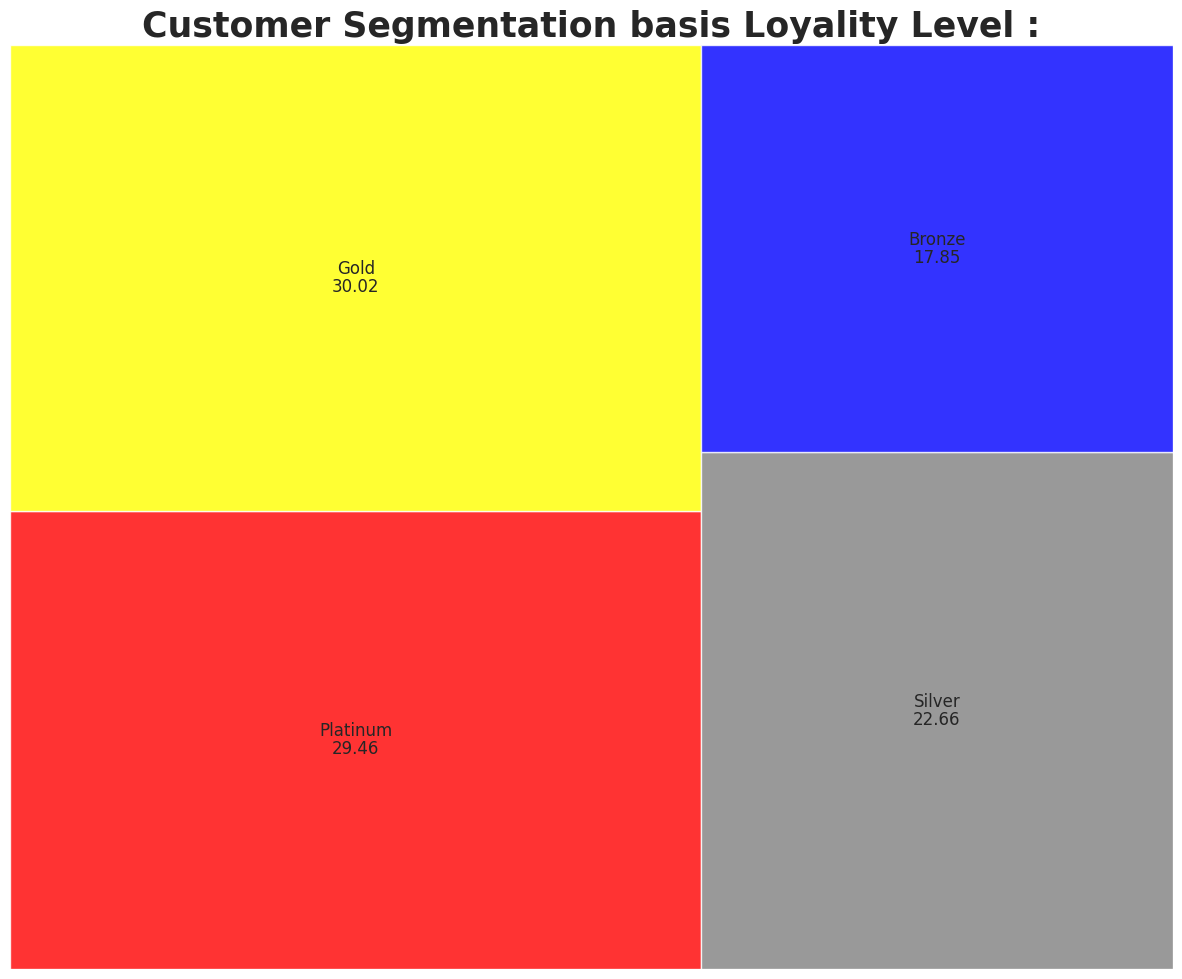

In [ ]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15,12)
colors_dics = {'Platinum':'red','Gold':'yellow', 'Silver':'gray','Bronze':'blue'}

#squarify.plot(sizes = final_report1['NumBuyers'], color = colors_dics.values(),label = ['{} \n{0.0f} customers \n{}%'.format(*final_report1.iloc[i]) for i in range(0, len(final_report1))], alpha=0.6)

squarify.plot(sizes=final_report1['NumBuyers'],color = colors_dics.values(), label = ['Platinum','Gold','Silver','Bronze'], alpha=0.8,
             value=final_report1['Percent'])
plt.title("Customer Segmentation basis Loyality Level :", fontsize=25, fontweight='bold')
plt.axis('off')
plt.show()

# K-means Cluster - Elbow method

# Hierarchical Cluster - Dendrogram (Agglomarative method)

In [ ]:
kmeans_data= RFMApproach[['Recency(Days)', 'Frequency', 'Monetory']]
kmeans_data

,Recency(Days),Frequency,Monetory
0,4,182,553704
1,77,27,257404
2,19,72,176613
3,311,16,41976
4,37,77,166972
...,...,...,...
4319,278,10,20480
4320,181,7,10774
4321,9,12,25177
4322,4,754,280608


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn import set_config
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans

KMeans(n_clusters=4, random_state=42)

In [ ]:
model_pipeline = Pipeline(steps=[("Preprocessing",MinMaxScaler()),("model",kmeans)])
model_pipeline

Pipeline(steps=[('Preprocessing', MinMaxScaler()),
                ('model', KMeans(n_clusters=4, random_state=42))])

In [ ]:
model_pipeline.fit(kmeans_data)

Pipeline(steps=[('Preprocessing', MinMaxScaler()),
                ('model', KMeans(n_clusters=4, random_state=42))])

22.722978552694148

In [ ]:
RFMApproach["KMeans_Label"]=model_pipeline.predict(kmeans_data)

In [ ]:
RFMApproach[['Loyality_Level',	'KMeans_Label']]

,Loyality_Level,KMeans_Label
0,Platinum,1
1,Gold,3
2,Platinum,1
3,Bronze,2
4,Gold,1
...,...,...
4319,Bronze,2
4320,Bronze,0
4321,Silver,1
4322,Platinum,1


In [ ]:
RFMApproach[['Loyality_Level']].value_counts(),RFMApproach[["KMeans_Label"]].value_counts()

(Loyality_Level
 Gold              1298
 Platinum          1274
 Silver             980
 Bronze             772
 Name: count, dtype: int64,
 KMeans_Label
 1               2116
 3               1072
 0                622
 2                514
 Name: count, dtype: int64)

<Axes: >

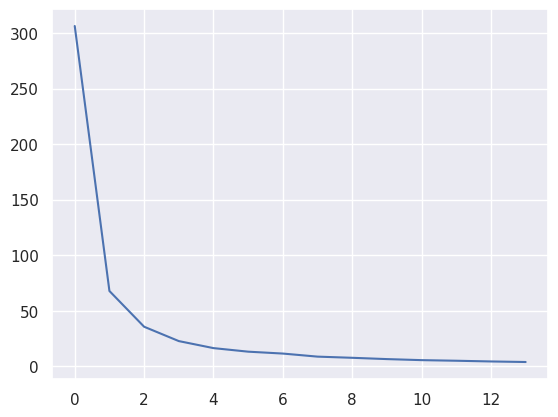

In [ ]:
error=list()
for  i in range(1,15):
  kmeans=KMeans(n_clusters=i,random_state=42)
  model_pipeline = Pipeline(steps=[("Preprocessing",MinMaxScaler()),("model",kmeans)])
  model_pipeline.fit(kmeans_data)
  error.append(kmeans.inertia_)
sns.lineplot(error)
